In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pathlib     

dataset_url = r"C:/Users/aishwarya.sonawane/Desktop/Image Classification/flower_photos"
data_dir = pathlib.Path(dataset_url)  

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\roses\10090824183_d02c613f10_m.jpg


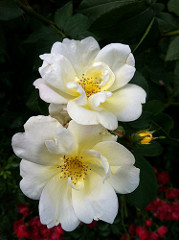

In [4]:
import PIL
roses = list(data_dir.glob('roses/*'))      # category
print(roses[0])

temp_image = PIL.Image.open(roses[0])
temp_image

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height, img_width = 180, 180
train_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=32)
val_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
len(train_ds) 

92

In [8]:
len(val_ds)

23

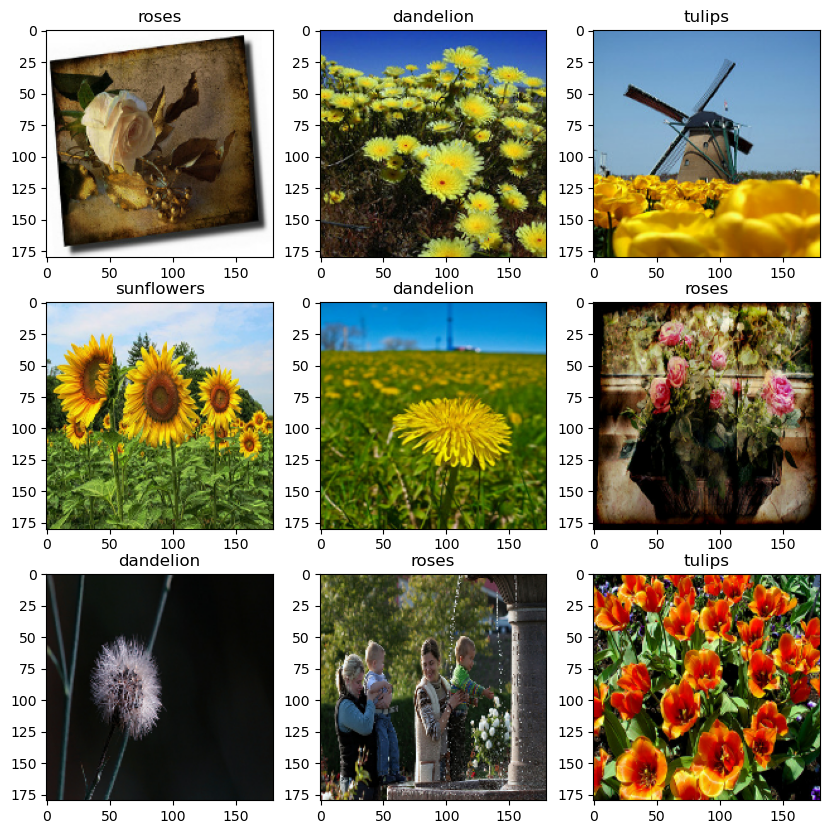

In [9]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):     
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))       
        plt.title(class_names[labels[i]])
    

In [19]:
num_classes = len(class_names)
epochs= 200
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Rescaling
model2= Sequential()

pretrained_model= InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
print(len(pretrained_model.layers))

for layer in pretrained_model.layers:
        layer.trainable=False
model2.add(tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)))
model2.add(pretrained_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(num_classes,activation='softmax'))

312


In [20]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  steps_per_epoch=5,
  epochs=epochs
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 8s/step - accuracy: 0.3871 - loss: 1.4948 - val_accuracy: 0.5736 - val_loss: 1.0489
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.5505 - loss: 1.0119 - val_accuracy: 0.6989 - val_loss: 0.8114
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.6689 - loss: 0.9400 - val_accuracy: 0.7357 - val_loss: 0.7257
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6306 - loss: 0.8613 - val_accuracy: 0.7139 - val_loss: 0.7557
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.6895 - loss: 0.7614 - val_accuracy: 0.7289 - val_loss: 0.7178
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.6788 - loss: 0.7630 - val_accuracy: 0.7589 - val_loss: 0.6369
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.7543 - loss: 0.6167 - val_accuracy: 0.7384 - val_loss: 0.7626
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.7927 - loss: 0.6336 - val_accuracy: 0.7670 - val_loss: 0.6086


C:\Users\aishwarya.sonawane\AppData\Local\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8054 - loss: 0.4456 - val_accuracy: 0.8079 - val_loss: 0.5040
Epoch 20/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.8003 - loss: 0.4960 - val_accuracy: 0.8038 - val_loss: 0.5202
Epoch 21/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8703 - loss: 0.3459 - val_accuracy: 0.8011 - val_loss: 0.5245
Epoch 22/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8558 - loss: 0.3633 - val_accuracy: 0.8338 - val_loss: 0.4751
Epoch 23/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8669 - loss: 0.3599 - val_accuracy: 0.8025 - val_loss: 0.5627
Epoch 24/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.7557 - loss: 0.5742 - val_accuracy: 0.8188 - val_loss: 0.4976
Epoch 25/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.8879 - loss: 0.3475 - val_accuracy: 0.8351 - val_loss: 0.4689
Epoch 26/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8091 - loss: 0.4545 - val_accuracy: 0.8215 - val_loss: 0.4972
Epoch

In [23]:
from keras.models import load_model
model2.save("inception_2.h5")
loaded_model_2 = load_model("inception_2.h5")

In [29]:
from tensorflow.keras.preprocessing import image as keras_image
def preprocess(img_path):
    img = keras_image.load_img(img_path, target_size=(180, 180))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
   
    return img_array
 
def predict_image(img_path):
    processed_image = preprocess(img_path)
    prediction = model2.predict(processed_image)
   
    label = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    print( f'Prediction: {label} ({confidence:.2f})')
    return label

In [30]:
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\dandelion\7132605107_f5e033d725_n.jpg"
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction: dandelion (0.99)
dandelion


In [31]:
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\daisy\3758221664_b19116d61f.jpg"
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction: daisy (1.00)
daisy


In [34]:
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\Flower Classification\Training Data\Rose\rose (726).jpeg"
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: roses (1.00)
roses


In [37]:
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\dandelion\463736819_f779800165.jpg"
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: dandelion (1.00)
dandelion


-------------------------------------------------------------------------------------------------------------------------------

#### Test Data

In [38]:
from tensorflow.keras.preprocessing import image as keras_image
def preprocess(img_path):
    img = keras_image.load_img(img_path, target_size=(180, 180))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
   
    return img_array
 
def predict_image(img_path):
    processed_image = preprocess(img_path)
    prediction = loaded_model_2.predict(processed_image)
   
    label = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    print( f'Prediction: {label} ({confidence:.2f})')
    return label

In [39]:
img_path = r"C:\Users\aishwarya.sonawane\Desktop\Image Classification\flower_photos\dandelion\463736819_f779800165.jpg"
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: dandelion (1.00)
dandelion
